In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle= True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle= True)

In [4]:
import torch.nn as nn #For OOP like setting
import torch.nn.functional as F 

In [5]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__() # To run initialization method from the parent class (nn.Module) we are inheriting from
        self.fc1 = nn.Linear(28*28, 64) # Input is flattened layer of 28x28
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x): # Input is x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.softmax(x, dim = 1)

In [6]:
net = Net()

In [7]:
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [9]:
output = net(X)

In [10]:
output

tensor([[0.1090, 0.0886, 0.0998, 0.0971, 0.0942, 0.1044, 0.1127, 0.1036, 0.0946,
         0.0959]], grad_fn=<SoftmaxBackward>)

In [11]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 4

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feature sets and labels
        X, y = data
        print(y)
        break

tensor([8, 2, 5, 7, 9, 1, 5, 9, 2, 3])
tensor([4, 4, 1, 4, 6, 1, 1, 6, 6, 8])
tensor([0, 6, 4, 2, 4, 0, 5, 0, 5, 5])
tensor([6, 4, 4, 3, 5, 1, 8, 8, 5, 0])


In [12]:
# The above run has given us 4 batches with each batch containing 10 examples as in the trainset

In [14]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 4

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of feature sets and labels
        X, y = data
        net.zero_grad()  # We make the gradient zero after each batch otw it will keep on summing
        output = net(X.view(-1, 28*28))
        loss = F.cross_entropy(output, y)
        loss.backward()
        optimizer.step() # For adjusting the weights
    print(loss)

tensor(1.4999, grad_fn=<NllLossBackward>)
tensor(1.5612, grad_fn=<NllLossBackward>)
tensor(1.4645, grad_fn=<NllLossBackward>)
tensor(1.5611, grad_fn=<NllLossBackward>)


In [16]:
correct = 0
total = 0

with torch.no_grad():  # We don't want to calculate the gradients if we are just doing forward pass
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print(f"Accuracy: {round(correct/total, 3)}")

Accuracy: 0.946


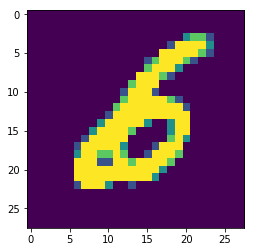

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()

In [32]:
print(torch.argmax(net(X[2].view(-1,784))[0]))

tensor(6, grad_fn=<NotImplemented>)


In [ ]:
# End of the notebook